<a href="https://colab.research.google.com/github/Gus-1003/Geoestatistica_Estudos_Dados/blob/main/DataSus_Brasil_2022/DataSus_Leitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto da Pesquisa:

## Registro de Ocupação Hospitalar COVID-19:
O Ministério da Saúde, por meio da Secretaria de Atenção Especializada em Saúde (SAES), implementou, devido à pandemia, o registro das internações por meio do Sistema ESUS Notifica-Módulo Internações SUS.

Esta página tem como finalidade disponibilizar o banco de dados da ocupação dos leitos, a partir da incorporação do sistema e-SUS Notifica- Módulo internações SUS, em vigor a partir de abril de 2020.

## Informações disponibilizadas:
O módulo Internações foi desenvolvido para registro da ocupação de leitos clínicos e de Unidade de Terapia Intensiva (UTI) SUS destinados para atendimento aos pacientes com casos suspeitos ou confirmados da COVID-19 (ocupação SRAG / COVID-19)

Alguns estados apresentam sistemas próprios de registro de ocupação e para esses foi disponibilizado uma API que transfere os dados dos estados para o sistema ESUS NOTIFICA- Módulo Internações SUS.

Devido ao grande número de registros pelos estabelecimentos de internações COVID-19, alguns estados já possuem mais de um milhão de registros, o que impossibilita estes dados de serem abertos no Excel, somente existe a disponibilização CSV.

A partir do ano de 2022 foi acrescentado novos campos utilizados para descrever a ocupação dos leitos. Registros com ano anterior a 2022 não contém esses campos preenchidos.

## Link da fonte: 
https://opendatasus.saude.gov.br/dataset/registro-de-ocupacao-hospitalar-covid-19

# Lista de Requisitos para o Projeto:

## Parte 1:  Amostragem

1. Escreva um algoritmo que realize:

    a- Leitura de arquivo (CSV): (✔️)

    b- Estatísticas descritivas:
        describe (✔️)
        box-plot (✔️)
        correlacao de Pearson ou mapa de calor. (✔️)

2. Faca a interpretação, pelo menos duas dessas variáveis.
3. Calcular tamanho de amostra com margem de erro 5%
4. Criar metodologias para seleção de amostras:

    a- aleatoria simples

    b- estratificada

    c- conglomerados

    d- sistematicas

5.   Criar algoritmo para fazer essa selecao dessa amostra


## Parte 2: Tópicos Analise de Componentes Principais (PCA) e  Analise Fatorial (FA).

1. Explanação da técnica de analise

    a- Quem fez?

    b- Qual o propósito geral?

    c- Quais sao as principais etapas?

2. Construa em seu algoritmo as seguintes técnicas:  
    a- Analise de Componentes Principais (PCA)

    b- Analise Fatorial (FA).

3. Interprete os resultados

# Importando Ferramentas:

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


# Análise Descrivitiva dos Dados

## Leitura do Arquivo:

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analises DataSus/esus-vepi.LeitoOcupacao_2022.csv', quotechar='"')

## Visualização Superficial do Dataset:

In [4]:
dados.head()

,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,641508,PBGTlqtFBP,2022-01-17T03:00:00.000Z,2379341,13.0,8.0,0.0,0.0,0.0,1.0,...,parse-cloud,_User$m6WdvZgbBS,Santa Catarina,Mafra,Santa Catarina,Mafra,False,False,2021-02-15T11:08:07.797Z,2022-01-17T21:56:42.351Z
1,1275198,ipPHkH1yIB,2022-01-05T03:00:00.000Z,2594366,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$C2nTBR5lmy,Paraná,Umuarama,Paraná,Umuarama,False,False,2021-12-08T10:42:04.123Z,2022-01-05T14:17:35.799Z
2,1290474,oDyVTndNXc,2022-01-01T03:00:50.682Z,2747871,NaN,NaN,NaN,NaN,1.0,9.0,...,parse-cloud,_User$APEoiAf61c,São Paulo,Ilhabela,São Paulo,Ilhabela,False,False,2022-01-01T03:34:58.234Z,2022-01-01T03:34:58.234Z
3,1290489,cTrwNtInVV,2022-01-01T03:00:08.570Z,2082497,NaN,NaN,NaN,NaN,0.0,1.0,...,parse-cloud,_User$q0FgtTNz2d,São Paulo,Bernardino de Campos,São Paulo,Bernardino de Campos,False,False,2022-01-01T04:50:29.194Z,2022-01-01T04:50:29.194Z
4,1290490,CPkiO32WyI,2022-01-01T03:00:14.691Z,2092980,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$u4yOaQOJlf,São Paulo,Bastos,São Paulo,Bastos,False,False,2022-01-01T05:01:31.468Z,2022-01-01T05:01:31.468Z


In [5]:
dados.shape

(243445, 26)

## Medidas Descritivas:

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243445 entries, 0 to 243444
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             243445 non-null  int64  
 1   _id                    243445 non-null  object 
 2   dataNotificacao        243445 non-null  object 
 3   cnes                   243445 non-null  object 
 4   ocupacaoSuspeitoCli    1 non-null       float64
 5   ocupacaoSuspeitoUti    1 non-null       float64
 6   ocupacaoConfirmadoCli  1 non-null       float64
 7   ocupacaoConfirmadoUti  1 non-null       float64
 8   ocupacaoCovidUti       243445 non-null  float64
 9   ocupacaoCovidCli       243445 non-null  float64
 10  ocupacaoHospitalarUti  243445 non-null  float64
 11  ocupacaoHospitalarCli  243445 non-null  float64
 12  saidaSuspeitaObitos    243445 non-null  float64
 13  saidaSuspeitaAltas     243445 non-null  float64
 14  saidaConfirmadaObitos  243445 non-nu

In [7]:
dados.isna().sum()

Unnamed: 0                    0
_id                           0
dataNotificacao               0
cnes                          0
ocupacaoSuspeitoCli      243444
ocupacaoSuspeitoUti      243444
ocupacaoConfirmadoCli    243444
ocupacaoConfirmadoUti    243444
ocupacaoCovidUti              0
ocupacaoCovidCli              0
ocupacaoHospitalarUti         0
ocupacaoHospitalarCli         0
saidaSuspeitaObitos           0
saidaSuspeitaAltas            0
saidaConfirmadaObitos         0
saidaConfirmadaAltas          0
origem                        0
_p_usuario                    0
estadoNotificacao             0
municipioNotificacao          0
estado                        0
municipio                     0
excluido                      0
validado                      0
_created_at                   0
_updated_at                   0
dtype: int64

In [8]:
dados.describe()

,Unnamed: 0,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas
count,2.434450e+05,1.0,1.0,1.0,1.0,243445.000000,243445.000000,243445.000000,243445.000000,243445.000000,243445.000000,243445.000000,243445.000000
mean,1.420358e+06,13.0,8.0,0.0,0.0,2.214574,3.241566,8.869367,36.556274,0.123794,0.548703,0.945059,6.659911
std,7.193734e+04,NaN,NaN,NaN,NaN,7.323370,44.984199,25.870032,78.219066,2.310973,9.545234,15.417578,157.534467
min,6.415080e+05,13.0,8.0,0.0,0.0,-7.000000,-1.000000,-5.000000,-1.000000,-5.000000,-5.000000,-1.000000,-6.000000
25%,1.360232e+06,13.0,8.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.421419e+06,13.0,8.0,0.0,0.0,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
75%,1.482411e+06,13.0,8.0,0.0,0.0,1.000000,2.000000,10.000000,42.000000,0.000000,0.000000,0.000000,0.000000
max,1.543300e+06,13.0,8.0,0.0,0.0,300.000000,21701.000000,8191.000000,21701.000000,106.000000,3292.000000,3300.000000,9167.000000


In [9]:
dados.describe(include='object')

,_id,dataNotificacao,cnes,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,_created_at,_updated_at
count,243445,243445,243445,243445,243445,243445,243445,243445,243445,243445,243445
unique,243445,117801,2019,7,1206,27,1206,27,1206,243310,243316
top,PBGTlqtFBP,2022-01-14T03:00:00.000Z,2775999,parse-cloud,_User$HzwsO90KQW,São Paulo,São Paulo,São Paulo,São Paulo,2022-02-26T03:01:24.290Z,2022-02-26T03:01:24.290Z
freq,1,577,248,150636,93596,62209,11408,62206,11408,2,2


## Representação Gráfica do dados:

In [10]:
numerados = dados[['ocupacaoCovidUti', 'ocupacaoCovidCli', 'ocupacaoHospitalarUti', 'ocupacaoHospitalarCli', 'saidaSuspeitaObitos', 
                          'saidaSuspeitaAltas', 'saidaConfirmadaObitos', 'saidaConfirmadaAltas']]

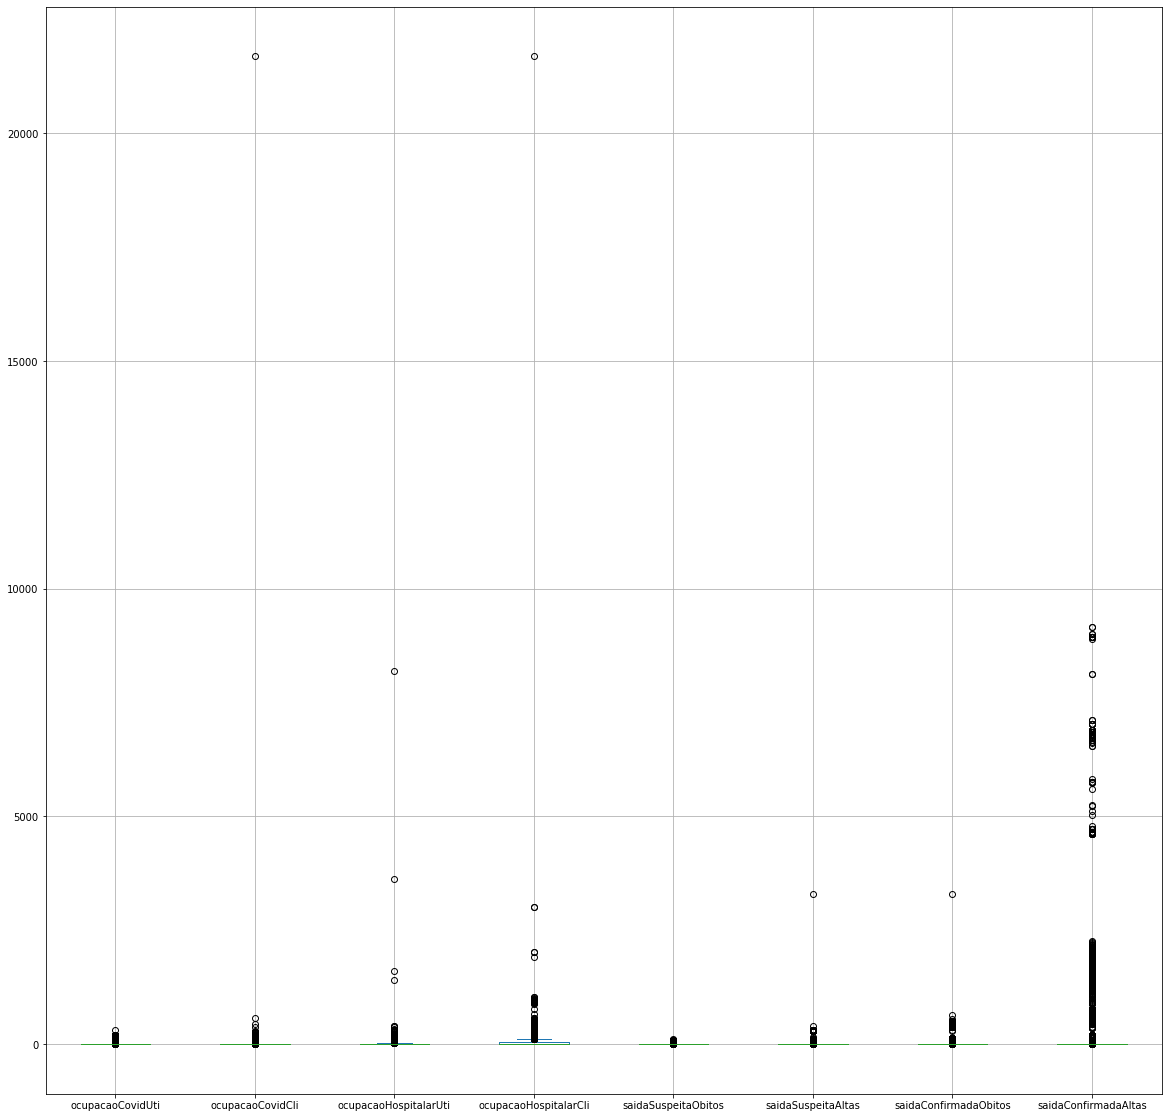

In [11]:
# Creating plot
numerados.plot.box(grid = True, figsize=(20,20))
 
# show plot
plt.show()

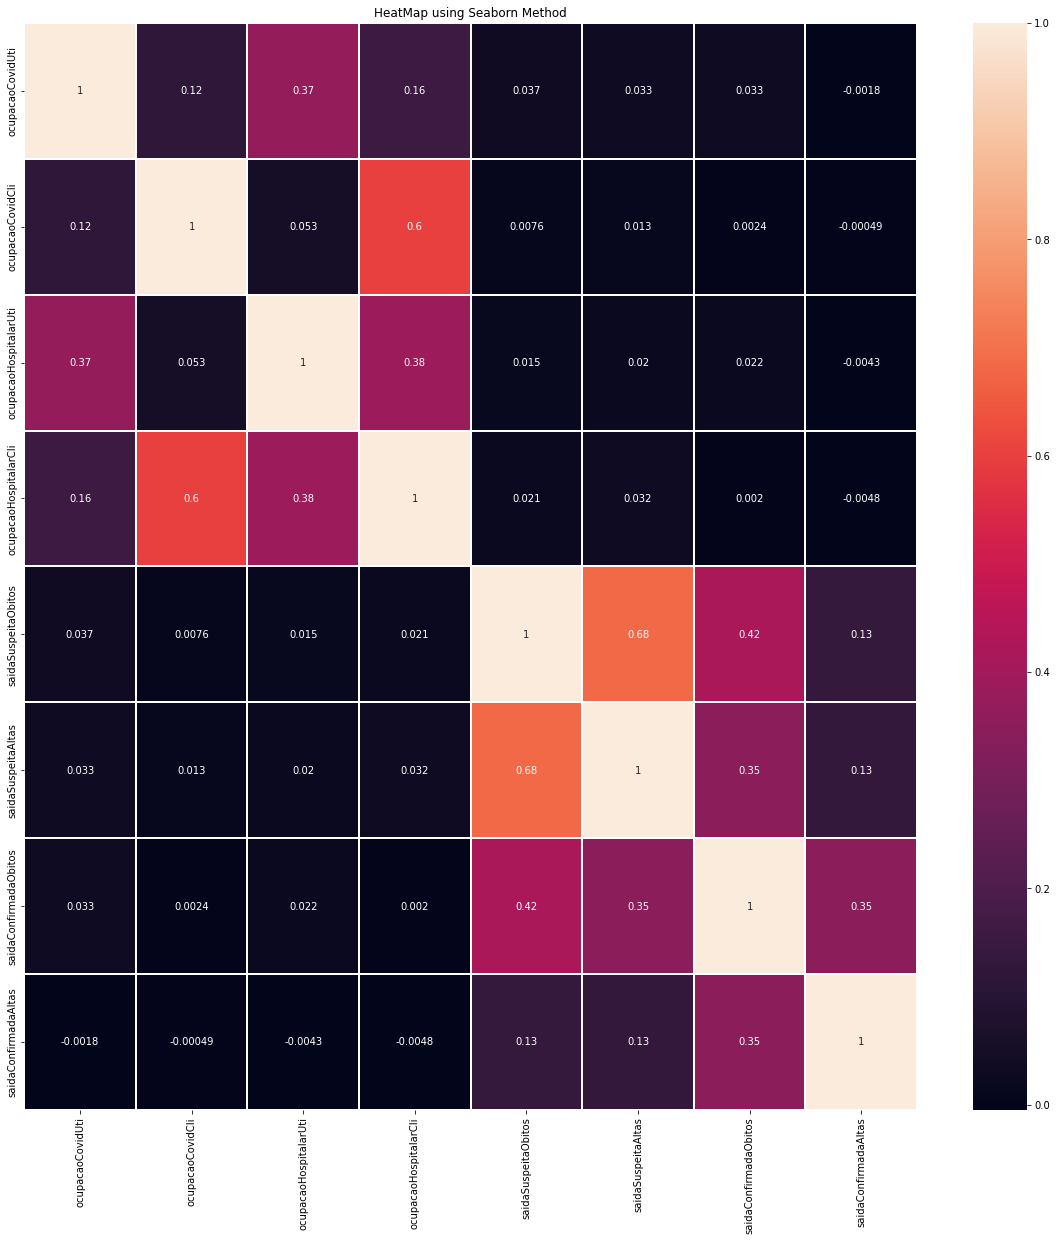

In [12]:
plt.figure(figsize=(20,20))
corr = numerados.select_dtypes(exclude='object').corr()
heat_map = sns.heatmap(corr, linewidth = 1 , annot = True)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

In [13]:
# sns.pairplot(data = numerados, kind="kde")

# Análise dos dados:

Inspirado pelo Projeto: https://www.kaggle.com/code/elloaguedes/panorama-do-covid-19-no-brasil

## Pergunta: A qual período de tempo os dados se referem?

In [14]:
print(min(dados['_created_at']))
print(max(dados['_created_at']))

2021-02-15T11:08:07.797Z
2022-08-23T21:47:39.399Z


## Pergunta: Em qual periodo houve uma maior quantidade de mortos / altas?

In [15]:
associar = dados.groupby(['_created_at'])['saidaConfirmadaObitos','saidaConfirmadaAltas'].agg('sum')
associar.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,saidaConfirmadaObitos,saidaConfirmadaAltas
_created_at,,
2021-02-15T11:08:07.797Z,0.0,1.0
2021-12-08T10:42:04.123Z,0.0,0.0
2022-01-01T03:34:58.234Z,0.0,0.0
2022-01-01T04:50:29.194Z,0.0,0.0
2022-01-01T05:01:31.468Z,0.0,0.0


In [16]:
# plot the dataframe
# dados.plot(x="_created_at", y="saidaConfirmadaObitos", kind="bar", figsize=(9, 8))

# print bar graph
# plt.show()

In [17]:
# plot the dataframe
# dados.plot(x="_created_at", y="saidaConfirmadaAltas", kind="bar", figsize=(9, 8))

# print bar graph
# plt.show()

# Quantidade de amostras:

## Amostragem Aleatoria Simples:

In [18]:
dados_sample = dados.sample(n=384)
dados_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 41685 to 210451
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             384 non-null    int64  
 1   _id                    384 non-null    object 
 2   dataNotificacao        384 non-null    object 
 3   cnes                   384 non-null    object 
 4   ocupacaoSuspeitoCli    0 non-null      float64
 5   ocupacaoSuspeitoUti    0 non-null      float64
 6   ocupacaoConfirmadoCli  0 non-null      float64
 7   ocupacaoConfirmadoUti  0 non-null      float64
 8   ocupacaoCovidUti       384 non-null    float64
 9   ocupacaoCovidCli       384 non-null    float64
 10  ocupacaoHospitalarUti  384 non-null    float64
 11  ocupacaoHospitalarCli  384 non-null    float64
 12  saidaSuspeitaObitos    384 non-null    float64
 13  saidaSuspeitaAltas     384 non-null    float64
 14  saidaConfirmadaObitos  384 non-null    float64
 15 

In [19]:
dados_sample.describe(include='object')

,_id,dataNotificacao,cnes,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,_created_at,_updated_at
count,384,384,384,384,384,384,384,384,384,384,384
unique,384,337,340,6,214,24,276,24,276,384,384
top,OpC2STDWAl,2022-04-21T03:00:00.000Z,4042085,parse-cloud,_User$HzwsO90KQW,São Paulo,São Paulo,São Paulo,São Paulo,2022-02-15T03:05:15.413Z,2022-02-15T03:05:15.413Z
freq,1,4,4,253,132,92,12,92,12,1,1


## Amostragem Aleatoria Estratificada:

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
dados['origem'].value_counts()

parse-cloud              150636
RPA-SP                    45953
RPA-GO                    30834
RPA-MS                    10580
RPA-PR-CURITIBA            2605
RPA-RN                     2287
RPA-MG-BELO-HORIZONTE       550
Name: origem, dtype: int64

## Amostragem Aleatoria por Conglomerados:

## Amostragem Aleatoria por Sistemática:

# Analise de Componentes Principais (PCA)

# Analise Fatorial (FA)